

COMPREHENSIVE MACHINE LEARNING TRAINING PROGRAM FOR BIOMEDICAL STUDENTS


This script provides complete, hands-on training in Machine Learning with:
1. Dummy biomedical datasets
2. Exploratory Data Analysis (EDA)
3. Supervised Learning (Regression & Classification)
4. Unsupervised Learning (Clustering & Dimensionality Reduction)
5. Reinforcement Learning (Q-Learning basics)
6. Multiple evaluation metrics
7. Model comparison and selection

Author: ML Training Program
Target Audience: Biomedical Students




In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report,
                             mean_squared_error, mean_absolute_error, r2_score,
                             roc_curve, roc_auc_score, silhouette_score)

# Supervised Learning - Classification
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB

# Unsupervised Learning
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("="*80)
print("MACHINE LEARNING COMPREHENSIVE TRAINING PROGRAM")
print("For Biomedical Students")
print("="*80)
print()


#==============================================================================
# SECTION 1: CREATING DUMMY BIOMEDICAL DATASETS
#==============================================================================

print("\n" + "="*80)
print("SECTION 1: CREATING DUMMY BIOMEDICAL DATASETS")
print("="*80)


MACHINE LEARNING COMPREHENSIVE TRAINING PROGRAM
For Biomedical Students


SECTION 1: CREATING DUMMY BIOMEDICAL DATASETS


In [6]:

def create_patient_data(n_samples=1000):
    """
    Create dummy patient dataset for disease prediction
    """
    np.random.seed(42)
    
    # Patient demographics and clinical measurements
    age = np.random.normal(55, 15, n_samples).astype(int)
    age = np.clip(age, 18, 90)
    
    gender = np.random.choice(['Male', 'Female'], n_samples)
    
    # BMI (Body Mass Index)
    bmi = np.random.normal(27, 5, n_samples)
    bmi = np.clip(bmi, 15, 45)
    
    # Blood Pressure (systolic)
    bp_systolic = np.random.normal(130, 20, n_samples)
    bp_systolic = np.clip(bp_systolic, 90, 200)
    
    # Glucose level (mg/dL)
    glucose = np.random.normal(110, 30, n_samples)
    glucose = np.clip(glucose, 70, 250)
    
    # Cholesterol (mg/dL)
    cholesterol = np.random.normal(200, 40, n_samples)
    cholesterol = np.clip(cholesterol, 120, 350)
    
    # HbA1c (%)
    hba1c = np.random.normal(6.0, 1.5, n_samples)
    hba1c = np.clip(hba1c, 4.0, 12.0)
    
    # Heart Rate
    heart_rate = np.random.normal(75, 12, n_samples)
    heart_rate = np.clip(heart_rate, 50, 120)
    
    # Smoking status
    smoking = np.random.choice(['Never', 'Former', 'Current'], n_samples, 
                               p=[0.5, 0.3, 0.2])
    
    # Family history
    family_history = np.random.choice([0, 1], n_samples, p=[0.7, 0.3])
    
    # Exercise (hours per week)
    exercise = np.random.exponential(2, n_samples)
    exercise = np.clip(exercise, 0, 15)
    
    # Create disease risk score (complex function of features)
    risk_score = (
        0.3 * (age - 18) / 72 +
        0.2 * (bmi - 15) / 30 +
        0.15 * (bp_systolic - 90) / 110 +
        0.15 * (glucose - 70) / 180 +
        0.1 * (cholesterol - 120) / 230 +
        0.05 * (hba1c - 4.0) / 8.0 +
        0.05 * family_history -
        0.05 * exercise / 15 +
        0.1 * (smoking == 'Current').astype(int)
    )
    
    # Add noise
    risk_score += np.random.normal(0, 0.1, n_samples)
    
    # Create binary disease outcome
    disease_probability = 1 / (1 + np.exp(-5 * (risk_score - 0.5)))
    disease = (np.random.random(n_samples) < disease_probability).astype(int)
    
    # Create DataFrame
    df = pd.DataFrame({
        'Age': age,
        'Gender': gender,
        'BMI': bmi.round(1),
        'BP_Systolic': bp_systolic.round(0),
        'Glucose': glucose.round(0),
        'Cholesterol': cholesterol.round(0),
        'HbA1c': hba1c.round(1),
        'Heart_Rate': heart_rate.round(0),
        'Smoking': smoking,
        'Family_History': family_history,
        'Exercise_Hours_Week': exercise.round(1),
        'Disease': disease
    })
    
    return df

def create_drug_response_data(n_samples=500):
    """
    Create dummy drug response dataset for regression
    """
    np.random.seed(42)
    
    # Patient characteristics
    age = np.random.normal(50, 15, n_samples)
    age = np.clip(age, 18, 85)
    
    weight = np.random.normal(75, 15, n_samples)
    weight = np.clip(weight, 45, 120)
    
    # Kidney function (eGFR)
    kidney_function = np.random.normal(90, 20, n_samples)
    kidney_function = np.clip(kidney_function, 30, 120)
    
    # Liver enzymes
    liver_enzymes = np.random.normal(30, 10, n_samples)
    liver_enzymes = np.clip(liver_enzymes, 10, 80)
    
    # Drug dosage (mg)
    dosage = np.random.choice([50, 100, 150, 200], n_samples)
    
    # Genetic marker (simulated)
    genetic_marker = np.random.choice([0, 1, 2], n_samples, p=[0.25, 0.5, 0.25])
    
    # Drug response (% improvement) - complex relationship
    response = (
        20 +  # baseline
        0.3 * dosage +
        0.2 * kidney_function +
        -0.3 * age +
        0.1 * weight +
        -0.2 * liver_enzymes +
        10 * genetic_marker +
        np.random.normal(0, 8, n_samples)  # noise
    )
    
    response = np.clip(response, 0, 100)
    
    df = pd.DataFrame({
        'Age': age.round(0),
        'Weight_kg': weight.round(1),
        'Kidney_Function_eGFR': kidney_function.round(0),
        'Liver_Enzymes_ALT': liver_enzymes.round(0),
        'Dosage_mg': dosage,
        'Genetic_Marker': genetic_marker,
        'Drug_Response_Percent': response.round(1)
    })
    
    return df

def create_gene_expression_data(n_samples=200, n_genes=50):
    """
    Create dummy gene expression dataset for clustering
    """
    np.random.seed(42)
    
    # Create 3 distinct patient groups with different expression patterns
    group_size = n_samples // 3
    
    # Group 1: High expression of first 20 genes
    group1 = np.random.normal(8, 1, (group_size, n_genes))
    group1[:, :20] += 3
    
    # Group 2: High expression of middle 20 genes
    group2 = np.random.normal(8, 1, (group_size, n_genes))
    group2[:, 15:35] += 3
    
    # Group 3: High expression of last 20 genes
    group3 = np.random.normal(8, 1, (n_samples - 2*group_size, n_genes))
    group3[:, 30:] += 3
    
    # Combine groups
    gene_data = np.vstack([group1, group2, group3])
    
    # Create DataFrame
    gene_names = [f'Gene_{i+1}' for i in range(n_genes)]
    df = pd.DataFrame(gene_data, columns=gene_names)
    
    # Add patient IDs and true labels (for evaluation only)
    df.insert(0, 'Patient_ID', [f'P{i+1:03d}' for i in range(n_samples)])
    true_labels = np.array([0]*group_size + [1]*group_size + [2]*(n_samples - 2*group_size))
    df['True_Group'] = true_labels
    
    return df


In [8]:

# Create datasets
print("\nCreating datasets...")
patient_df = create_patient_data(1000)
drug_df = create_drug_response_data(500)
gene_df = create_gene_expression_data(200, 50)

print(f"✓ Patient disease dataset: {patient_df.shape}")
print(f"✓ Drug response dataset: {drug_df.shape}")
print(f"✓ Gene expression dataset: {gene_df.shape}")

# Save datasets
patient_df.to_csv('patient_disease_data.csv', index=False)
drug_df.to_csv('drug_response_data.csv', index=False)
gene_df.to_csv('gene_expression_data.csv', index=False)

print("\n✓ Datasets saved to CSV files")


#==============================================================================
# SECTION 2: EXPLORATORY DATA ANALYSIS (EDA)
#==============================================================================

print("\n" + "="*80)
print("SECTION 2: EXPLORATORY DATA ANALYSIS (EDA)")
print("="*80)

print("\n--- 2.1: Patient Disease Dataset ---")
print("\nFirst 5 rows:")
print(patient_df.head())

print("\nDataset Info:")
print(patient_df.info())

print("\nBasic Statistics:")
print(patient_df.describe())

print("\nMissing Values:")
print(patient_df.isnull().sum())

print("\nClass Distribution:")
print(patient_df['Disease'].value_counts())
print(f"Disease prevalence: {patient_df['Disease'].mean()*100:.1f}%")



Creating datasets...
✓ Patient disease dataset: (1000, 12)
✓ Drug response dataset: (500, 7)
✓ Gene expression dataset: (200, 52)

✓ Datasets saved to CSV files

SECTION 2: EXPLORATORY DATA ANALYSIS (EDA)

--- 2.1: Patient Disease Dataset ---

First 5 rows:
   Age  Gender   BMI  BP_Systolic  Glucose  Cholesterol  HbA1c  Heart_Rate  \
0   62    Male  25.2        128.0    169.0        234.0    4.0        64.0   
1   52  Female  27.9        101.0     70.0        146.0    7.2        85.0   
2   64    Male  20.3        112.0    125.0        164.0    6.4        76.0   
3   77  Female  22.1        110.0    155.0        161.0    7.1        60.0   
4   51    Male  33.0        134.0    178.0        243.0    4.0        86.0   

   Smoking  Family_History  Exercise_Hours_Week  Disease  
0    Never               0                  0.6        0  
1   Former               0                  2.6        0  
2   Former               1                  1.1        0  
3  Current               0          


Creating EDA visualizations...


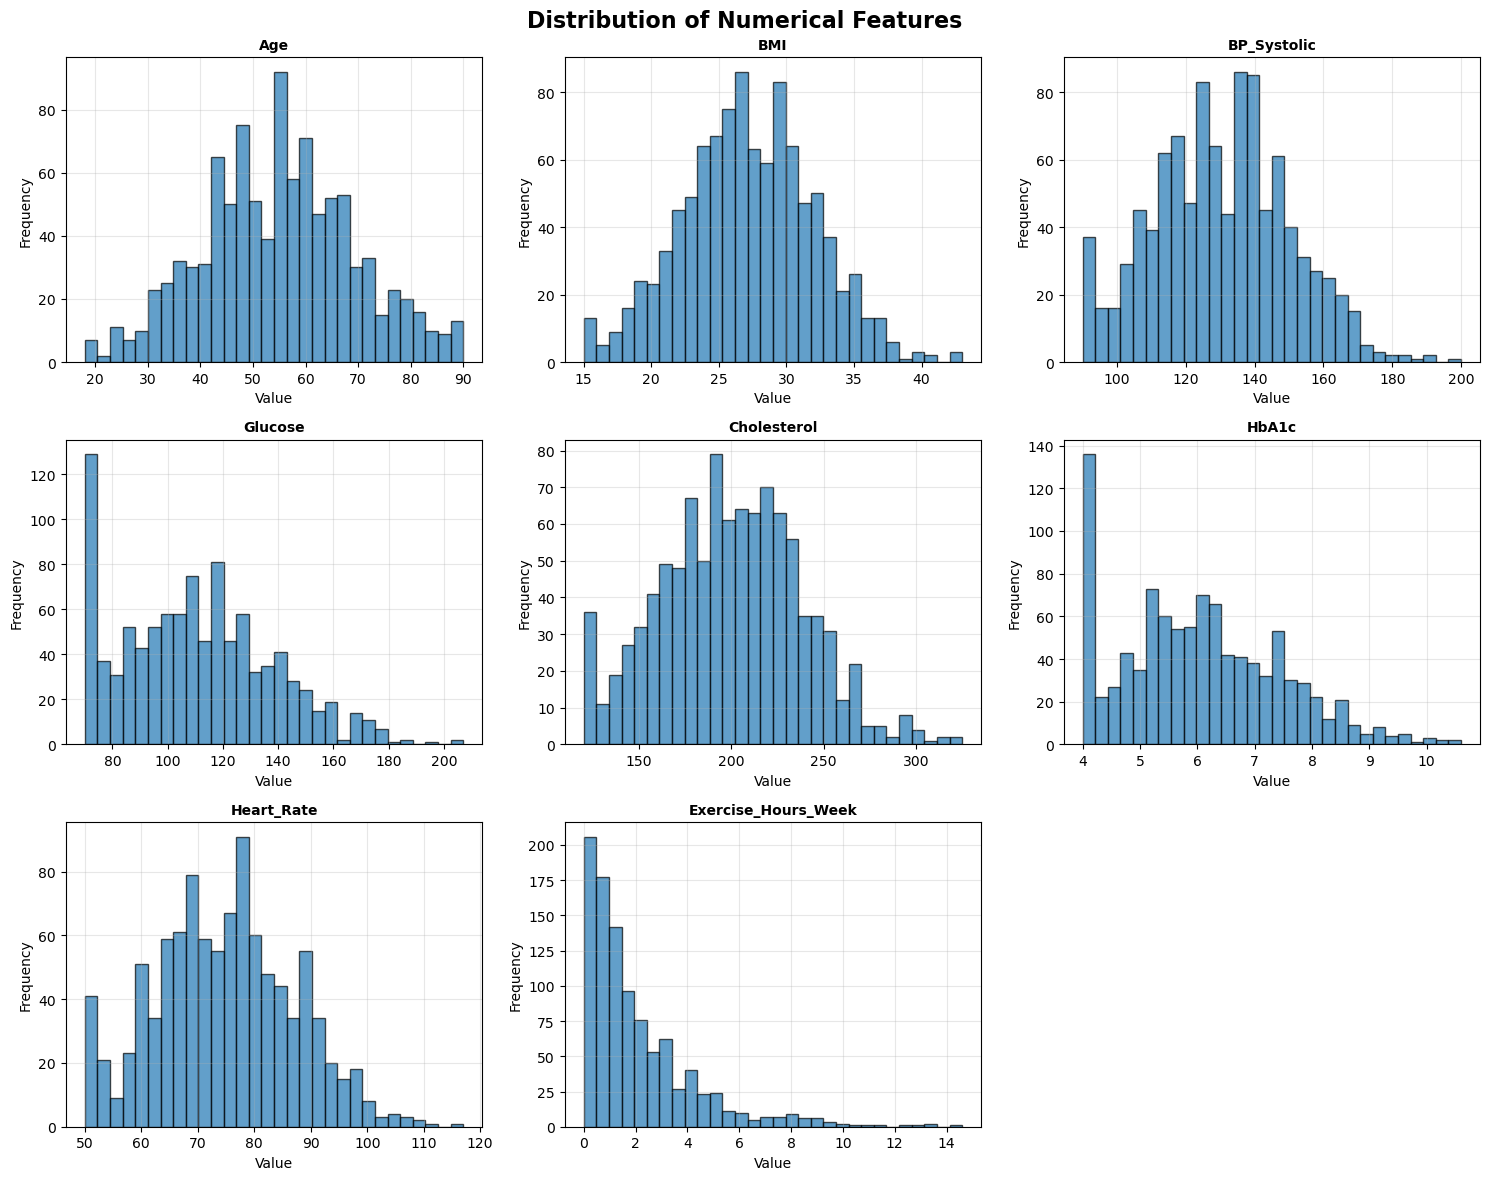

In [10]:

# Visualizations
print("\nCreating EDA visualizations...")

# Create figure directory
import os
os.makedirs('eda_figures', exist_ok=True)

# 1. Distribution plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribution of Numerical Features', fontsize=16, weight='bold')

numerical_cols = ['Age', 'BMI', 'BP_Systolic', 'Glucose', 'Cholesterol', 
                  'HbA1c', 'Heart_Rate', 'Exercise_Hours_Week']

for idx, col in enumerate(numerical_cols):
    row = idx // 3
    col_idx = idx % 3
    
    axes[row, col_idx].hist(patient_df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[row, col_idx].set_title(col, fontsize=10, weight='bold')
    axes[row, col_idx].set_xlabel('Value')
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].grid(True, alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[2, 2])

plt.tight_layout()


In [11]:

plt.savefig('eda_figures/01_distributions.png', dpi=150, bbox_inches='tight')
plt.close()

print("✓ Saved: 01_distributions.png")


✓ Saved: 01_distributions.png


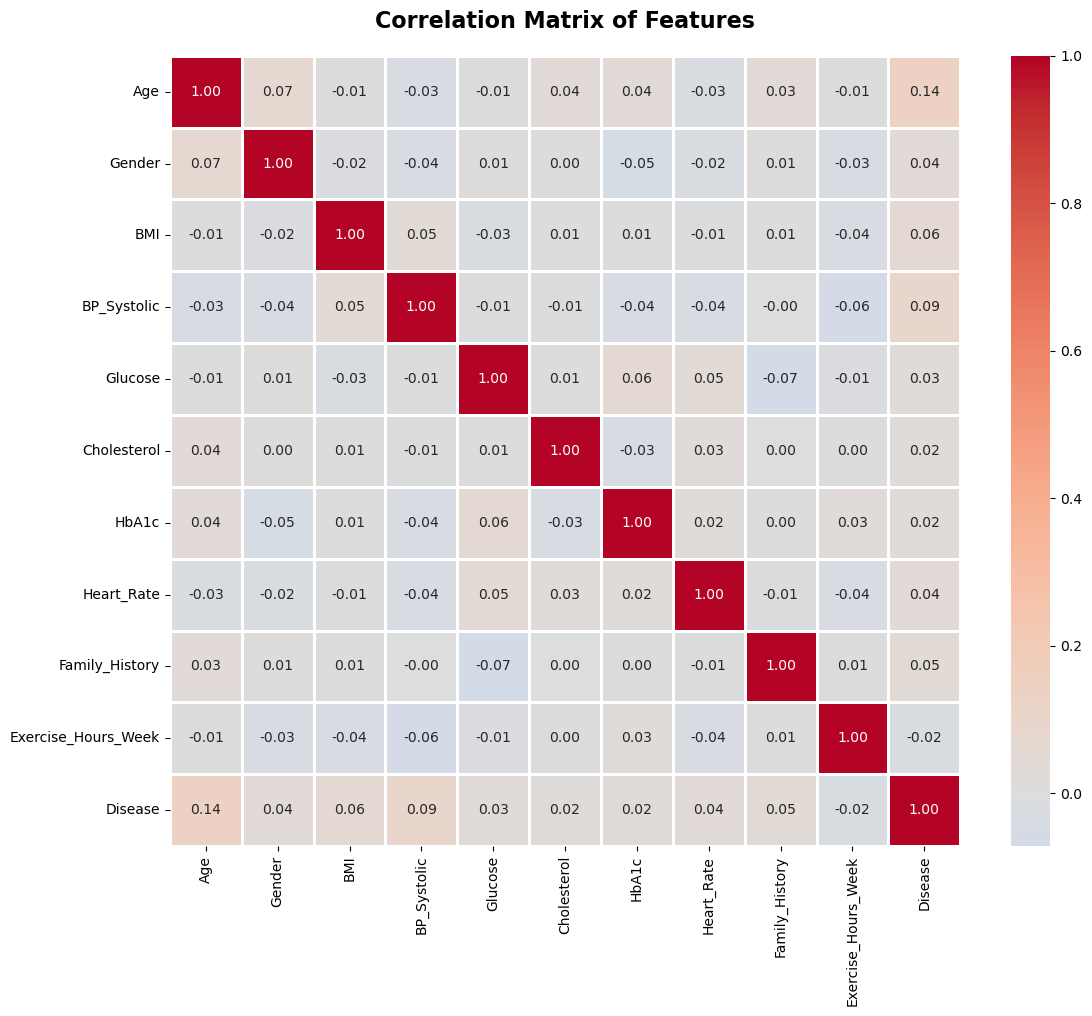

In [13]:

# 2. Correlation heatmap
plt.figure(figsize=(12, 10))

# Encode categorical variables for correlation
df_encoded = patient_df.copy()
df_encoded['Gender'] = (df_encoded['Gender'] == 'Male').astype(int)
smoking_encoded = pd.get_dummies(df_encoded['Smoking'], prefix='Smoking')
df_encoded = pd.concat([df_encoded.drop('Smoking', axis=1), smoking_encoded], axis=1)

# Select numerical columns
num_cols = df_encoded.select_dtypes(include=[np.number]).columns

correlation_matrix = df_encoded[num_cols].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Matrix of Features', fontsize=16, weight='bold', pad=20)
plt.tight_layout()


In [15]:

plt.savefig('eda_figures/02_correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.close()

print("✓ Saved: 02_correlation_heatmap.png")

✓ Saved: 02_correlation_heatmap.png


In [ ]:


# 3. Box plots by disease status
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Feature Distributions by Disease Status', fontsize=16, weight='bold')

plot_cols = ['Age', 'BMI', 'BP_Systolic', 'Glucose', 'Cholesterol', 
             'HbA1c', 'Heart_Rate', 'Exercise_Hours_Week']

for idx, col in enumerate(plot_cols):
    row = idx // 4
    col_idx = idx % 4
    
    patient_df.boxplot(column=col, by='Disease', ax=axes[row, col_idx])
    axes[row, col_idx].set_title(col)
    axes[row, col_idx].set_xlabel('Disease (0=No, 1=Yes)')
    axes[row, col_idx].set_ylabel(col)
    axes[row, col_idx].get_figure().suptitle('')

plt.tight_layout()


In [ ]:

plt.savefig('eda_figures/03_boxplots_by_disease.png', dpi=150, bbox_inches='tight')
plt.close()

print("✓ Saved: 03_boxplots_by_disease.png")


In [ ]:

# 4. Pair plot for key features
key_features = ['Age', 'BMI', 'Glucose', 'HbA1c', 'Disease']
pairplot = sns.pairplot(patient_df[key_features], hue='Disease', diag_kind='hist',
                        palette={0: '#4A90E2', 1: '#E24A4A'})
pairplot.fig.suptitle('Pair Plot of Key Features', y=1.02, fontsize=16, weight='bold')


In [ ]:

plt.savefig('eda_figures/04_pairplot.png', dpi=150, bbox_inches='tight')
plt.close()

print("✓ Saved: 04_pairplot.png")


In [ ]:

# 5. Categorical features analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Categorical Features Analysis', fontsize=16, weight='bold')

# Gender distribution
gender_disease = pd.crosstab(patient_df['Gender'], patient_df['Disease'], normalize='index') * 100
gender_disease.plot(kind='bar', ax=axes[0], color=['#4A90E2', '#E24A4A'])
axes[0].set_title('Disease Rate by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Percentage (%)')
axes[0].legend(['No Disease', 'Disease'])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)


In [ ]:

# Smoking distribution
smoking_disease = pd.crosstab(patient_df['Smoking'], patient_df['Disease'], normalize='index') * 100
smoking_disease.plot(kind='bar', ax=axes[1], color=['#4A90E2', '#E24A4A'])
axes[1].set_title('Disease Rate by Smoking Status')
axes[1].set_xlabel('Smoking Status')
axes[1].set_ylabel('Percentage (%)')
axes[1].legend(['No Disease', 'Disease'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)


In [ ]:

# Family history
fh_disease = pd.crosstab(patient_df['Family_History'], patient_df['Disease'], normalize='index') * 100
fh_disease.plot(kind='bar', ax=axes[2], color=['#4A90E2', '#E24A4A'])
axes[2].set_title('Disease Rate by Family History')
axes[2].set_xlabel('Family History (0=No, 1=Yes)')
axes[2].set_ylabel('Percentage (%)')
axes[2].legend(['No Disease', 'Disease'])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=0)


In [ ]:

plt.tight_layout()
plt.savefig('eda_figures/05_categorical_analysis.png', dpi=150, bbox_inches='tight')
plt.close()

print("✓ Saved: 05_categorical_analysis.png")

print("\n✓ All EDA visualizations completed and saved to 'eda_figures/' directory")





### SECTION 3: SUPERVISED LEARNING - CLASSIFICATION



In [17]:

print("\n" + "="*80)
print("SECTION 3: SUPERVISED LEARNING - CLASSIFICATION")
print("="*80)

print("\n--- 3.1: Data Preparation ---")

# Prepare features and target
X = patient_df.drop(['Disease'], axis=1)
y = patient_df['Disease']

# Encode categorical variables
le_gender = LabelEncoder()
X['Gender'] = le_gender.fit_transform(X['Gender'])

# One-hot encode smoking status
X = pd.get_dummies(X, columns=['Smoking'], drop_first=True)

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeatures: {list(X.columns)}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      random_state=42, stratify=y)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Data prepared and split")

print("\n--- 3.2: Training Multiple Classification Algorithms ---")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(kernel='rbf', random_state=42, probability=True),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Store results
results = {}

print("\nTraining models...")

for name, model in models.items():
    print(f"\n{name}:")
    
    # Train model (use scaled data for algorithms that need it)
    if name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Cross-validation
    if name in ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']:
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
    else:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  ROC-AUC:   {roc_auc:.4f}")
    print(f"  CV Score:  {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

print("\n✓ All models trained")

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['Accuracy'] for m in results],
    'Precision': [results[m]['Precision'] for m in results],
    'Recall': [results[m]['Recall'] for m in results],
    'F1-Score': [results[m]['F1-Score'] for m in results],
    'ROC-AUC': [results[m]['ROC-AUC'] for m in results],
    'CV Mean': [results[m]['CV Mean'] for m in results]
})

print("\n--- 3.3: Model Comparison ---")
print("\n" + comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.loc[comparison_df['F1-Score'].idxmax(), 'Model']
print(f"\n🏆 Best Model (by F1-Score): {best_model_name}")

print("\n--- 3.4: Detailed Evaluation of Best Model ---")

best_y_pred = results[best_model_name]['y_pred']

print(f"\nConfusion Matrix for {best_model_name}:")
cm = confusion_matrix(y_test, best_y_pred)
print(cm)
print(f"\nTrue Negatives:  {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives:  {cm[1,1]}")

print(f"\nClassification Report:")
print(classification_report(y_test, best_y_pred, 
                          target_names=['No Disease', 'Disease']))

# Visualize results
os.makedirs('classification_results', exist_ok=True)



SECTION 3: SUPERVISED LEARNING - CLASSIFICATION

--- 3.1: Data Preparation ---
Feature matrix shape: (1000, 12)
Target vector shape: (1000,)

Features: ['Age', 'Gender', 'BMI', 'BP_Systolic', 'Glucose', 'Cholesterol', 'HbA1c', 'Heart_Rate', 'Family_History', 'Exercise_Hours_Week', 'Smoking_Former', 'Smoking_Never']

Training set: 800 samples
Test set: 200 samples

✓ Data prepared and split

--- 3.2: Training Multiple Classification Algorithms ---

Training models...

Logistic Regression:
  Accuracy:  0.6100
  Precision: 0.4839
  Recall:    0.1948
  F1-Score:  0.2778
  ROC-AUC:   0.5849
  CV Score:  0.6337 (+/- 0.0226)

Decision Tree:
  Accuracy:  0.4900
  Precision: 0.3188
  Recall:    0.2857
  F1-Score:  0.3014
  ROC-AUC:   0.4518
  CV Score:  0.5450 (+/- 0.0278)

Random Forest:
  Accuracy:  0.5750
  Precision: 0.3750
  Recall:    0.1558
  F1-Score:  0.2202
  ROC-AUC:   0.5629
  CV Score:  0.5938 (+/- 0.0168)

K-Nearest Neighbors:
  Accuracy:  0.5900
  Precision: 0.4419
  Recall:    

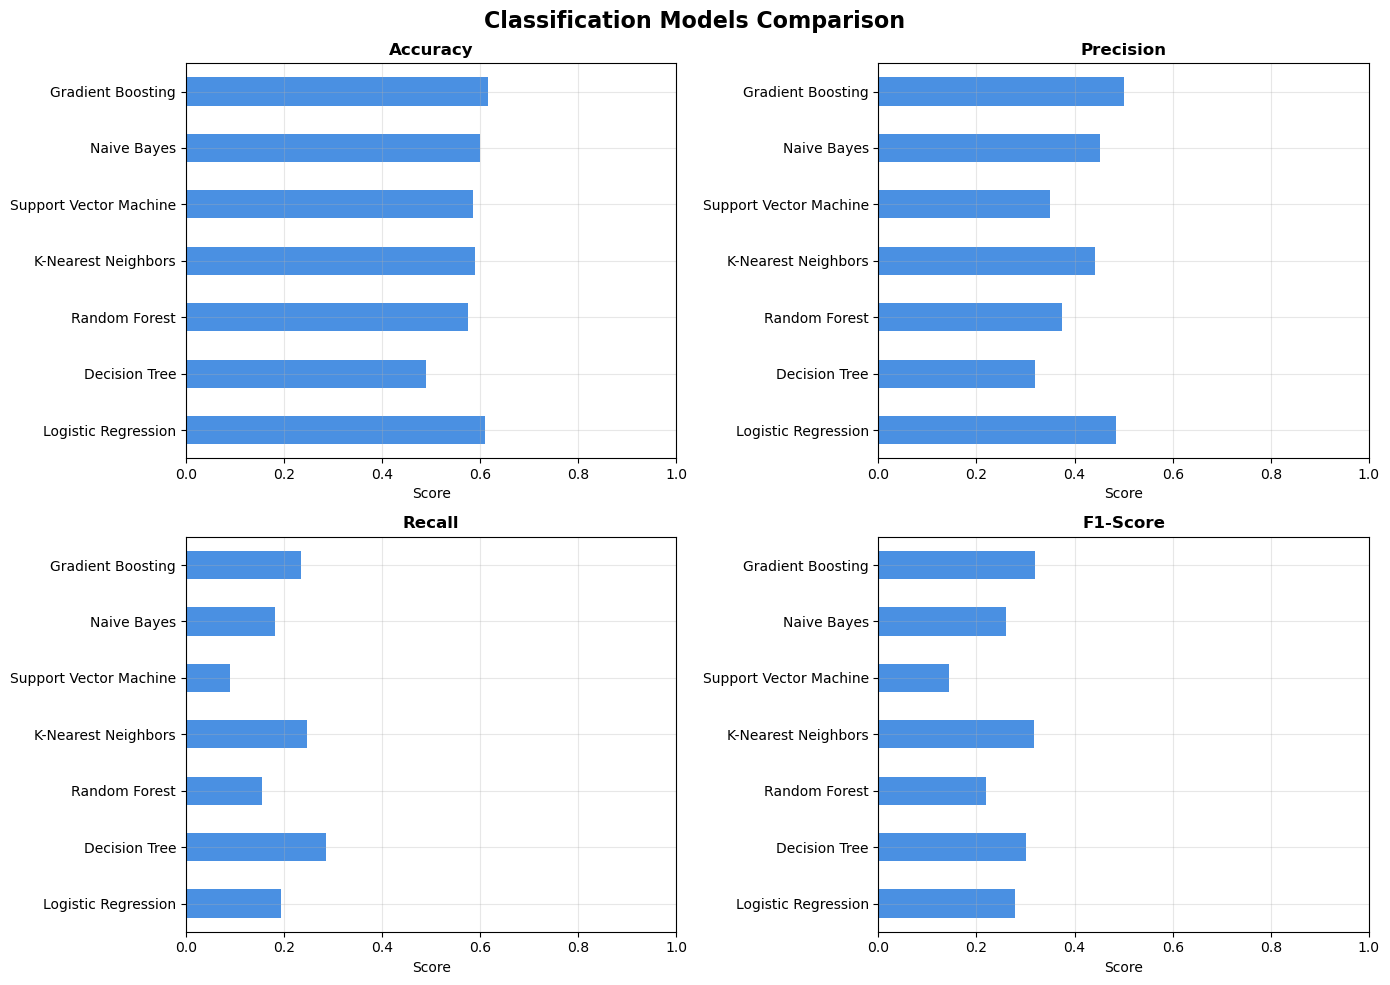

In [18]:

# 1. Model comparison plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Classification Models Comparison', fontsize=16, weight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
for idx, metric in enumerate(metrics):
    row = idx // 2
    col = idx % 2
    
    comparison_df.plot(x='Model', y=metric, kind='barh', ax=axes[row, col],
                      legend=False, color='#4A90E2')
    axes[row, col].set_title(metric, fontsize=12, weight='bold')
    axes[row, col].set_xlabel('Score')
    axes[row, col].set_ylabel('')
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].set_xlim(0, 1)

plt.tight_layout()


In [19]:

plt.savefig('classification_results/01_model_comparison.png', dpi=150, bbox_inches='tight')
plt.close()

print("\n✓ Saved: classification_results/01_model_comparison.png")



✓ Saved: classification_results/01_model_comparison.png


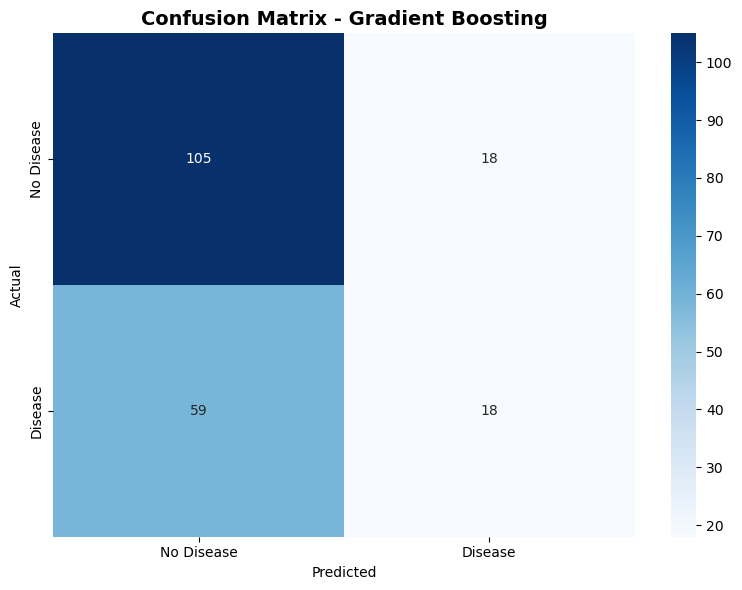

In [21]:
# 2. Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, weight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()


In [22]:

plt.savefig('classification_results/02_confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.close()

print("✓ Saved: classification_results/02_confusion_matrix.png")


✓ Saved: classification_results/02_confusion_matrix.png


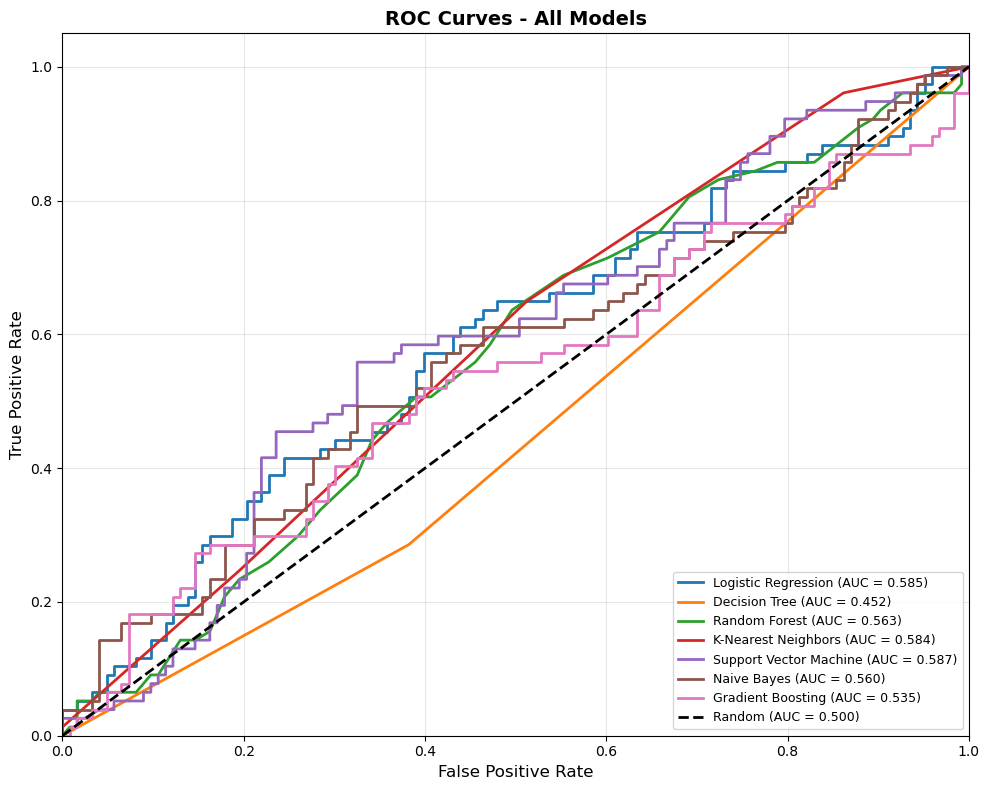

In [23]:

# 3. ROC Curves
plt.figure(figsize=(10, 8))

for name in results:
    fpr, tpr, _ = roc_curve(y_test, results[name]['y_pred_proba'])
    roc_auc = results[name]['ROC-AUC']
    plt.plot(fpr, tpr, linewidth=2, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random (AUC = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=14, weight='bold')
plt.legend(loc="lower right", fontsize=9)
plt.grid(True, alpha=0.3)
plt.tight_layout()


In [24]:

plt.savefig('classification_results/03_roc_curves.png', dpi=150, bbox_inches='tight')
plt.close()

print("✓ Saved: classification_results/03_roc_curves.png")


✓ Saved: classification_results/03_roc_curves.png


In [25]:

# 4. Feature importance (for tree-based models)
if best_model_name in ['Decision Tree', 'Random Forest', 'Gradient Boosting']:
    best_model = models[best_model_name]
    
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(feature_importance)), feature_importance['Importance'])
    plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title(f'Feature Importance - {best_model_name}', fontsize=14, weight='bold')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.savefig('classification_results/04_feature_importance.png', dpi=150, bbox_inches='tight')
    plt.close()
    
    print("✓ Saved: classification_results/04_feature_importance.png")
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10).to_string(index=False))


✓ Saved: classification_results/04_feature_importance.png

Top 10 Most Important Features:
            Feature  Importance
                BMI    0.154805
            Glucose    0.151857
        BP_Systolic    0.133396
         Heart_Rate    0.124319
Exercise_Hours_Week    0.117464
                Age    0.106952
        Cholesterol    0.087544
              HbA1c    0.084838
             Gender    0.016762
     Family_History    0.008812


In [26]:


#==============================================================================
# SECTION 4: SUPERVISED LEARNING - REGRESSION
#==============================================================================

print("\n" + "="*80)
print("SECTION 4: SUPERVISED LEARNING - REGRESSION")
print("="*80)

print("\n--- 4.1: Data Preparation ---")

# Prepare drug response data
X_reg = drug_df.drop(['Drug_Response_Percent'], axis=1)
y_reg = drug_df['Drug_Response_Percent']

print(f"Feature matrix shape: {X_reg.shape}")
print(f"Target vector shape: {y_reg.shape}")
print(f"\nFeatures: {list(X_reg.columns)}")



SECTION 4: SUPERVISED LEARNING - REGRESSION

--- 4.1: Data Preparation ---
Feature matrix shape: (500, 6)
Target vector shape: (500,)

Features: ['Age', 'Weight_kg', 'Kidney_Function_eGFR', 'Liver_Enzymes_ALT', 'Dosage_mg', 'Genetic_Marker']


In [27]:

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Scale features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print(f"\nTraining set: {X_train_reg.shape[0]} samples")
print(f"Test set: {X_test_reg.shape[0]} samples")

print("\n--- 4.2: Training Multiple Regression Algorithms ---")

# Initialize regression models
reg_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Support Vector Regression': SVR(kernel='rbf')
}

reg_results = {}

print("\nTraining regression models...")

for name, model in reg_models.items():
    print(f"\n{name}:")
    
    # Train model
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 
                'K-Nearest Neighbors', 'Support Vector Regression']:
        model.fit(X_train_reg_scaled, y_train_reg)
        y_pred_reg = model.predict(X_test_reg_scaled)
    else:
        model.fit(X_train_reg, y_train_reg)
        y_pred_reg = model.predict(X_test_reg)
    
    # Calculate metrics
    mse = mean_squared_error(y_test_reg, y_pred_reg)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_reg, y_pred_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)
    
    # Store results
    reg_results[name] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'y_pred': y_pred_reg
    }
    
    print(f"  MSE:  {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE:  {mae:.4f}")
    print(f"  R²:   {r2:.4f}")

print("\n✓ All regression models trained")



Training set: 400 samples
Test set: 100 samples

--- 4.2: Training Multiple Regression Algorithms ---

Training regression models...

Linear Regression:
  MSE:  59.8303
  RMSE: 7.7350
  MAE:  6.3471
  R²:   0.8565

Ridge Regression:
  MSE:  59.8699
  RMSE: 7.7376
  MAE:  6.3486
  R²:   0.8564

Lasso Regression:
  MSE:  67.8334
  RMSE: 8.2361
  MAE:  6.5023
  R²:   0.8373

Decision Tree:
  MSE:  117.0850
  RMSE: 10.8206
  MAE:  8.3920
  R²:   0.7192

Random Forest:
  MSE:  70.9690
  RMSE: 8.4243
  MAE:  6.6545
  R²:   0.8298

K-Nearest Neighbors:
  MSE:  96.5034
  RMSE: 9.8236
  MAE:  8.1280
  R²:   0.7686

Support Vector Regression:
  MSE:  147.1393
  RMSE: 12.1301
  MAE:  9.6919
  R²:   0.6471

✓ All regression models trained


In [28]:

# Create comparison DataFrame
reg_comparison_df = pd.DataFrame({
    'Model': list(reg_results.keys()),
    'RMSE': [reg_results[m]['RMSE'] for m in reg_results],
    'MAE': [reg_results[m]['MAE'] for m in reg_results],
    'R²': [reg_results[m]['R2'] for m in reg_results]
})

print("\n--- 4.3: Regression Model Comparison ---")
print("\n" + reg_comparison_df.to_string(index=False))



--- 4.3: Regression Model Comparison ---

                    Model      RMSE      MAE       R²
        Linear Regression  7.735004 6.347077 0.856508
         Ridge Regression  7.737566 6.348634 0.856413
         Lasso Regression  8.236106 6.502260 0.837314
            Decision Tree 10.820582 8.392000 0.719192
            Random Forest  8.424308 6.654460 0.829794
      K-Nearest Neighbors  9.823614 8.128000 0.768554
Support Vector Regression 12.130099 9.691851 0.647113



🏆 Best Regression Model (by R²): Linear Regression


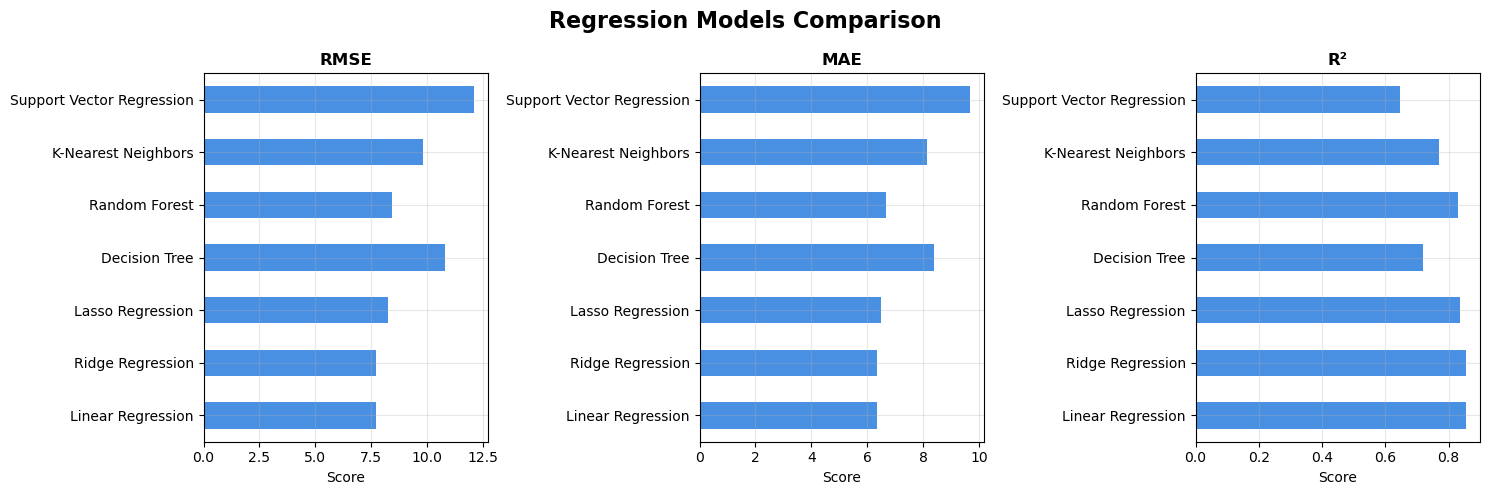

In [29]:

# Find best model
best_reg_model = reg_comparison_df.loc[reg_comparison_df['R²'].idxmax(), 'Model']
print(f"\n🏆 Best Regression Model (by R²): {best_reg_model}")

# Visualize regression results
os.makedirs('regression_results', exist_ok=True)

# 1. Model comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Regression Models Comparison', fontsize=16, weight='bold')

metrics = ['RMSE', 'MAE', 'R²']
for idx, metric in enumerate(metrics):
    reg_comparison_df.plot(x='Model', y=metric, kind='barh', ax=axes[idx],
                          legend=False, color='#4A90E2')
    axes[idx].set_title(metric, fontsize=12, weight='bold')
    axes[idx].set_xlabel('Score')
    axes[idx].set_ylabel('')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()


In [ ]:

plt.savefig('regression_results/01_model_comparison.png', dpi=150, bbox_inches='tight')
plt.close()

print("\n✓ Saved: regression_results/01_model_comparison.png")


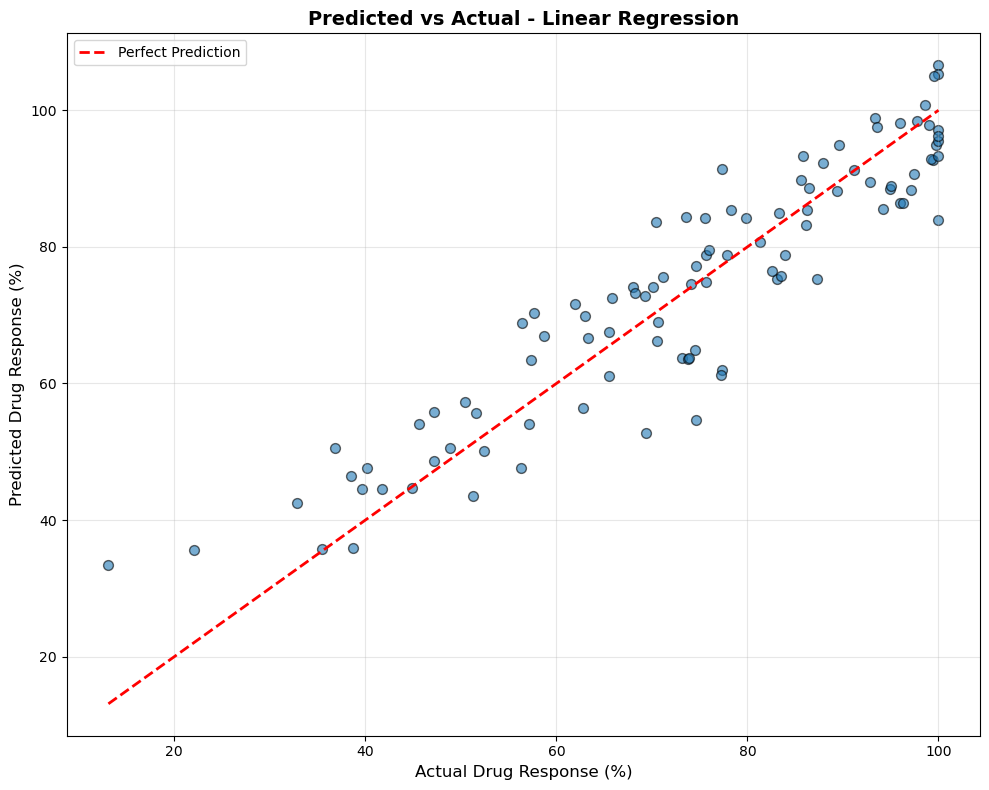

In [31]:

# 2. Prediction vs Actual plot
best_y_pred_reg = reg_results[best_reg_model]['y_pred']

plt.figure(figsize=(10, 8))
plt.scatter(y_test_reg, best_y_pred_reg, alpha=0.6, s=50, edgecolor='black')
plt.plot([y_test_reg.min(), y_test_reg.max()], 
         [y_test_reg.min(), y_test_reg.max()], 
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Drug Response (%)', fontsize=12)
plt.ylabel('Predicted Drug Response (%)', fontsize=12)
plt.title(f'Predicted vs Actual - {best_reg_model}', fontsize=14, weight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()


In [32]:

plt.savefig('regression_results/02_prediction_vs_actual.png', dpi=150, bbox_inches='tight')
plt.close()

print("✓ Saved: regression_results/02_prediction_vs_actual.png")


✓ Saved: regression_results/02_prediction_vs_actual.png


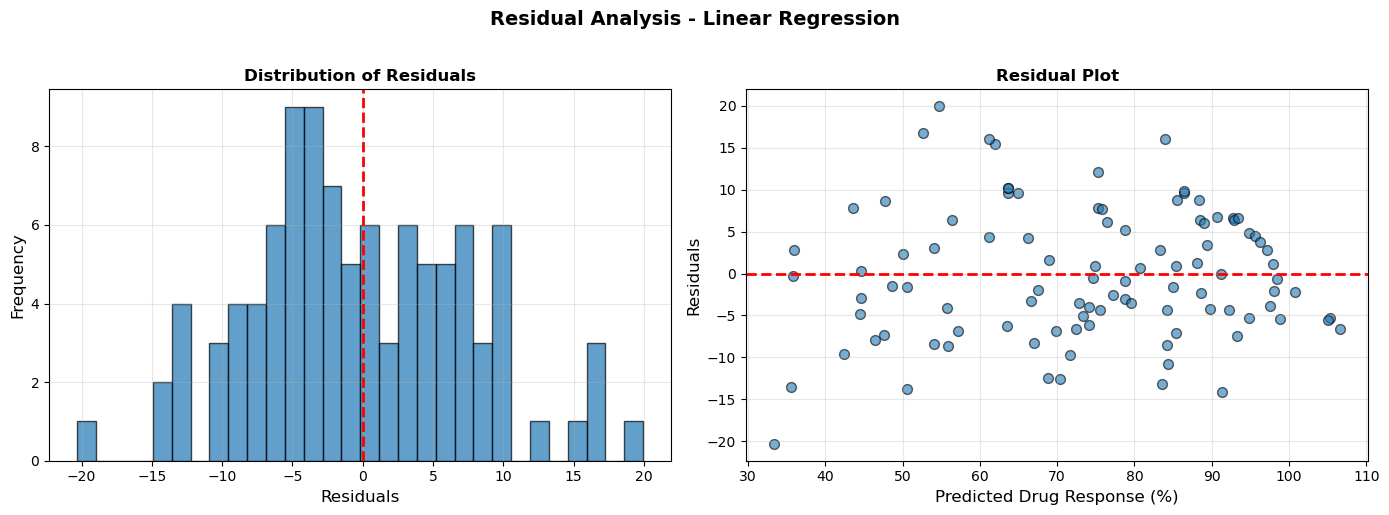

In [33]:

# 3. Residual plot
residuals = y_test_reg - best_y_pred_reg

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual distribution
axes[0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residuals', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Residuals', fontsize=12, weight='bold')
axes[0].grid(True, alpha=0.3)

# Residual vs predicted
axes[1].scatter(best_y_pred_reg, residuals, alpha=0.6, s=50, edgecolor='black')
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Drug Response (%)', fontsize=12)
axes[1].set_ylabel('Residuals', fontsize=12)
axes[1].set_title('Residual Plot', fontsize=12, weight='bold')
axes[1].grid(True, alpha=0.3)

plt.suptitle(f'Residual Analysis - {best_reg_model}', fontsize=14, weight='bold', y=1.02)
plt.tight_layout()


In [34]:

plt.savefig('regression_results/03_residual_analysis.png', dpi=150, bbox_inches='tight')
plt.close()

print("✓ Saved: regression_results/03_residual_analysis.png")



✓ Saved: regression_results/03_residual_analysis.png


In [35]:

#==============================================================================
# SECTION 5: UNSUPERVISED LEARNING - CLUSTERING
#==============================================================================

print("\n" + "="*80)
print("SECTION 5: UNSUPERVISED LEARNING - CLUSTERING")
print("="*80)



SECTION 5: UNSUPERVISED LEARNING - CLUSTERING


In [36]:

print("\n--- 5.1: Data Preparation ---")

# Use gene expression data (excluding Patient_ID and True_Group)
X_cluster = gene_df.drop(['Patient_ID', 'True_Group'], axis=1)
true_labels = gene_df['True_Group'].values

print(f"Gene expression matrix shape: {X_cluster.shape}")

# Scale features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)



--- 5.1: Data Preparation ---
Gene expression matrix shape: (200, 50)



--- 5.2: Dimensionality Reduction (PCA) ---

Number of components for 95% variance: 35
Total variance explained by first 2 components: 68.54%


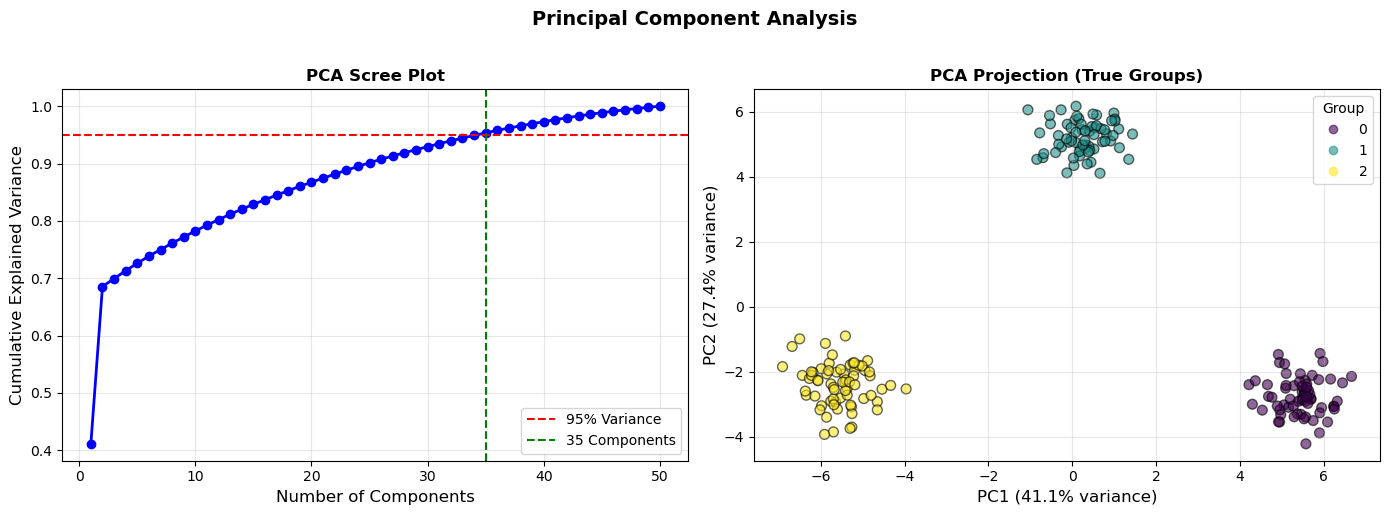

In [37]:

print("\n--- 5.2: Dimensionality Reduction (PCA) ---")

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_cluster_scaled)

# Explained variance
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
n_components_95 = np.argmax(cumsum_variance >= 0.95) + 1

print(f"\nNumber of components for 95% variance: {n_components_95}")
print(f"Total variance explained by first 2 components: {cumsum_variance[1]:.2%}")

# Visualize PCA
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scree plot
axes[0].plot(range(1, len(cumsum_variance)+1), cumsum_variance, 'bo-', linewidth=2)
axes[0].axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
axes[0].axvline(x=n_components_95, color='g', linestyle='--', 
                label=f'{n_components_95} Components')
axes[0].set_xlabel('Number of Components', fontsize=12)
axes[0].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[0].set_title('PCA Scree Plot', fontsize=12, weight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2D PCA plot colored by true groups
scatter = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=true_labels, 
                         cmap='viridis', s=50, alpha=0.6, edgecolor='black')
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
axes[1].set_title('PCA Projection (True Groups)', fontsize=12, weight='bold')
axes[1].legend(*scatter.legend_elements(), title="Group")
axes[1].grid(True, alpha=0.3)

plt.suptitle('Principal Component Analysis', fontsize=14, weight='bold', y=1.02)
plt.tight_layout()



✓ Saved: unsupervised_results/01_pca_analysis.png

--- 5.3: K-Means Clustering ---

✓ Saved: unsupervised_results/02_optimal_clusters.png

Optimal number of clusters (by Silhouette Score): 3
Silhouette Score: 0.4793
Adjusted Rand Index: 1.0000
Normalized Mutual Information: 1.0000

--- 5.4: Comparing Clustering Algorithms ---

K-Means:
  Number of clusters: 3
  Silhouette Score: 0.4793
  Adjusted Rand Index: 1.0000
  Normalized Mutual Information: 1.0000

DBSCAN:
  Number of clusters: 0
  Silhouette Score: N/A
  Adjusted Rand Index: 0.0000
  Normalized Mutual Information: 0.0000

Hierarchical:
  Number of clusters: 3
  Silhouette Score: 0.4793
  Adjusted Rand Index: 1.0000
  Normalized Mutual Information: 1.0000


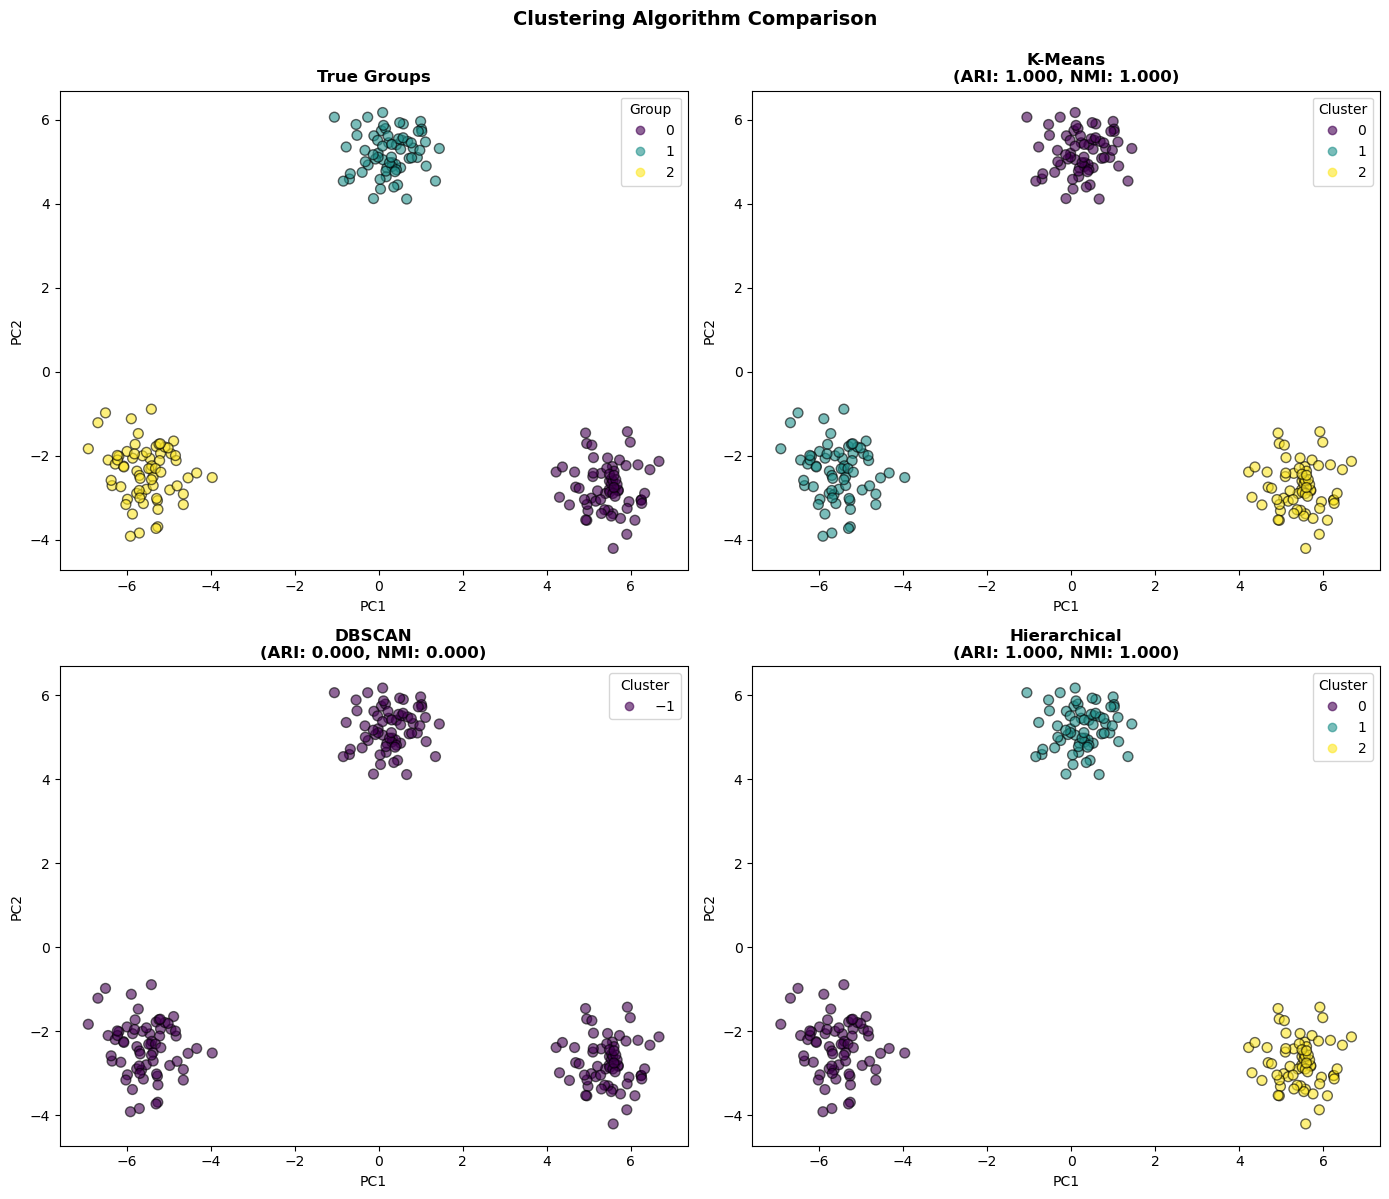

In [38]:

os.makedirs('unsupervised_results', exist_ok=True)
plt.savefig('unsupervised_results/01_pca_analysis.png', dpi=150, bbox_inches='tight')
plt.close()

print("\n✓ Saved: unsupervised_results/01_pca_analysis.png")

print("\n--- 5.3: K-Means Clustering ---")

# Elbow method to find optimal k
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans.labels_))

# Plot elbow curve
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Elbow Method', fontsize=12, weight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Analysis', fontsize=12, weight='bold')
axes[1].grid(True, alpha=0.3)

plt.suptitle('Optimal Number of Clusters', fontsize=14, weight='bold', y=1.02)
plt.tight_layout()
plt.savefig('unsupervised_results/02_optimal_clusters.png', dpi=150, bbox_inches='tight')
plt.close()

print("\n✓ Saved: unsupervised_results/02_optimal_clusters.png")

# Find optimal k (highest silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters (by Silhouette Score): {optimal_k}")

# Apply K-Means with optimal k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_cluster_scaled)

# Evaluate clustering
silhouette_avg = silhouette_score(X_cluster_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Compare with true labels (for evaluation purposes)
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

ari = adjusted_rand_score(true_labels, cluster_labels)
nmi = normalized_mutual_info_score(true_labels, cluster_labels)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Normalized Mutual Information: {nmi:.4f}")

print("\n--- 5.4: Comparing Clustering Algorithms ---")

# Apply different clustering algorithms
clustering_algorithms = {
    'K-Means': KMeans(n_clusters=3, random_state=42, n_init=10),
    'DBSCAN': DBSCAN(eps=3, min_samples=5),
    'Hierarchical': AgglomerativeClustering(n_clusters=3)
}

clustering_results = {}

for name, algorithm in clustering_algorithms.items():
    labels = algorithm.fit_predict(X_cluster_scaled)
    
    # DBSCAN might have noise points (-1), handle them
    if len(set(labels)) > 1 and -1 not in labels:
        sil_score = silhouette_score(X_cluster_scaled, labels)
    else:
        sil_score = None
    
    ari_score = adjusted_rand_score(true_labels, labels)
    nmi_score = normalized_mutual_info_score(true_labels, labels)
    
    clustering_results[name] = {
        'Labels': labels,
        'Silhouette': sil_score,
        'ARI': ari_score,
        'NMI': nmi_score,
        'N_Clusters': len(set(labels)) - (1 if -1 in labels else 0)
    }
    
    print(f"\n{name}:")
    print(f"  Number of clusters: {clustering_results[name]['N_Clusters']}")
    print(f"  Silhouette Score: {sil_score:.4f}" if sil_score else "  Silhouette Score: N/A")
    print(f"  Adjusted Rand Index: {ari_score:.4f}")
    print(f"  Normalized Mutual Information: {nmi_score:.4f}")

# Visualize clustering results
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Use PCA for 2D visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_cluster_scaled)

# Plot true labels
scatter = axes[0, 0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=true_labels,
                            cmap='viridis', s=50, alpha=0.6, edgecolor='black')
axes[0, 0].set_title('True Groups', fontsize=12, weight='bold')
axes[0, 0].set_xlabel('PC1')
axes[0, 0].set_ylabel('PC2')
axes[0, 0].legend(*scatter.legend_elements(), title="Group")

# Plot clustering results
for idx, (name, result) in enumerate(clustering_results.items()):
    row = (idx + 1) // 2
    col = (idx + 1) % 2
    
    scatter = axes[row, col].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], 
                                    c=result['Labels'], cmap='viridis',
                                    s=50, alpha=0.6, edgecolor='black')
    axes[row, col].set_title(f'{name}\n(ARI: {result["ARI"]:.3f}, NMI: {result["NMI"]:.3f})',
                            fontsize=12, weight='bold')
    axes[row, col].set_xlabel('PC1')
    axes[row, col].set_ylabel('PC2')
    axes[row, col].legend(*scatter.legend_elements(), title="Cluster")

plt.suptitle('Clustering Algorithm Comparison', fontsize=14, weight='bold', y=0.995)
plt.tight_layout()


In [39]:

plt.savefig('unsupervised_results/03_clustering_comparison.png', dpi=150, bbox_inches='tight')
plt.close()

print("\n✓ Saved: unsupervised_results/03_clustering_comparison.png")



✓ Saved: unsupervised_results/03_clustering_comparison.png



--- 5.5: t-SNE Visualization ---


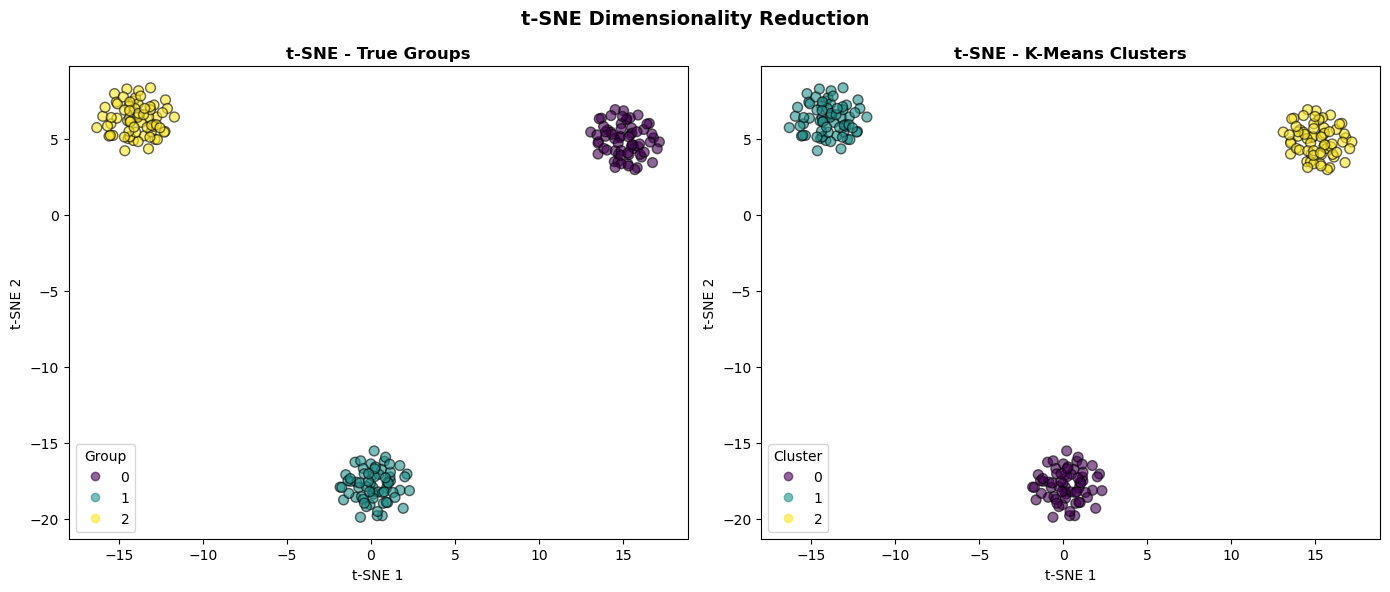

In [40]:

# t-SNE visualization
print("\n--- 5.5: t-SNE Visualization ---")

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_cluster_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# t-SNE with true labels
scatter = axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=true_labels,
                         cmap='viridis', s=50, alpha=0.6, edgecolor='black')
axes[0].set_title('t-SNE - True Groups', fontsize=12, weight='bold')
axes[0].set_xlabel('t-SNE 1')
axes[0].set_ylabel('t-SNE 2')
axes[0].legend(*scatter.legend_elements(), title="Group")

# t-SNE with K-Means clusters
scatter = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels,
                         cmap='viridis', s=50, alpha=0.6, edgecolor='black')
axes[1].set_title('t-SNE - K-Means Clusters', fontsize=12, weight='bold')
axes[1].set_xlabel('t-SNE 1')
axes[1].set_ylabel('t-SNE 2')
axes[1].legend(*scatter.legend_elements(), title="Cluster")

plt.suptitle('t-SNE Dimensionality Reduction', fontsize=14, weight='bold', y=0.98)
plt.tight_layout()


In [41]:

plt.savefig('unsupervised_results/04_tsne_visualization.png', dpi=150, bbox_inches='tight')
plt.close()

print("\n✓ Saved: unsupervised_results/04_tsne_visualization.png")




✓ Saved: unsupervised_results/04_tsne_visualization.png


In [42]:

#==============================================================================
# SECTION 6: REINFORCEMENT LEARNING - Q-LEARNING BASICS
#==============================================================================

print("\n" + "="*80)
print("SECTION 6: REINFORCEMENT LEARNING - Q-LEARNING BASICS")
print("="*80)

print("\n--- 6.1: Simple Medical Treatment Environment ---")
print("""
Scenario: A simple drug dosage optimization problem
- States: Patient condition (Low, Medium, High severity)
- Actions: Dosage level (Low, Medium, High)
- Rewards: Based on treatment effectiveness and side effects
""")

class MedicalTreatmentEnv:
    """
    Simple environment for drug dosage optimization
    States: 0=Low severity, 1=Medium severity, 2=High severity
    Actions: 0=Low dose, 1=Medium dose, 2=High dose
    """
    def __init__(self):
        self.n_states = 3
        self.n_actions = 3
        self.state = 1  # Start at medium severity
        
    def reset(self):
        """Reset to initial state"""
        self.state = 1
        return self.state
    
    def step(self, action):
        """
        Take action and return next_state, reward, done
        
        Reward logic:
        - Matching action to state gives high reward
        - Undertreatment (low dose for high severity) gives negative reward
        - Overtreatment (high dose for low severity) causes side effects
        """
        # Calculate reward
        if action == self.state:
            # Perfect match
            reward = 10
        elif abs(action - self.state) == 1:
            # Close match
            reward = 5
        else:
            # Mismatch
            reward = -5
        
        # Transition to next state (simplified: improves with good treatment)
        if action >= self.state and self.state > 0:
            # Good treatment, condition improves
            next_state = max(0, self.state - 1)
        else:
            # Poor treatment, condition stays same or worsens
            next_state = min(2, self.state + np.random.choice([0, 1]))
        
        # Check if done (patient recovered - low severity state)
        done = (next_state == 0)
        
        self.state = next_state
        
        return next_state, reward, done

def q_learning(env, episodes=1000, alpha=0.1, gamma=0.95, epsilon=0.1):
    """
    Q-Learning algorithm
    
    Parameters:
    - alpha: learning rate
    - gamma: discount factor
    - epsilon: exploration rate
    """
    # Initialize Q-table
    Q = np.zeros((env.n_states, env.n_actions))
    
    # Track rewards
    episode_rewards = []
    
    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False
        steps = 0
        max_steps = 20  # Prevent infinite loops
        
        while not done and steps < max_steps:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action = np.random.randint(env.n_actions)  # Explore
            else:
                action = np.argmax(Q[state, :])  # Exploit
            
            # Take action
            next_state, reward, done = env.step(action)
            
            # Q-learning update
            Q[state, action] = Q[state, action] + alpha * (
                reward + gamma * np.max(Q[next_state, :]) - Q[state, action]
            )
            
            state = next_state
            total_reward += reward
            steps += 1
        
        episode_rewards.append(total_reward)
    
    return Q, episode_rewards

print("\n--- 6.2: Training Q-Learning Agent ---")

# Create environment
env = MedicalTreatmentEnv()

# Train agent
print("Training agent...")
Q_table, rewards = q_learning(env, episodes=1000, alpha=0.1, gamma=0.95, epsilon=0.1)

print("\n✓ Training completed")

print("\n--- 6.3: Learned Q-Table ---")
print("\nOptimal Q-Values:")
print("States: 0=Low severity, 1=Medium severity, 2=High severity")
print("Actions: 0=Low dose, 1=Medium dose, 2=High dose")
print("\n", pd.DataFrame(Q_table, 
                        columns=['Low Dose', 'Medium Dose', 'High Dose'],
                        index=['Low Severity', 'Medium Severity', 'High Severity']))

print("\n--- 6.4: Optimal Policy ---")
print("\nRecommended actions for each state:")
state_names = ['Low Severity', 'Medium Severity', 'High Severity']
action_names = ['Low Dose', 'Medium Dose', 'High Dose']

for state in range(env.n_states):
    best_action = np.argmax(Q_table[state, :])
    print(f"  {state_names[state]}: {action_names[best_action]}")

# Visualize learning progress
os.makedirs('reinforcement_results', exist_ok=True)

# Plot learning curve
window_size = 50
smoothed_rewards = pd.Series(rewards).rolling(window=window_size).mean()

plt.figure(figsize=(12, 6))
plt.plot(rewards, alpha=0.3, label='Episode Reward')
plt.plot(smoothed_rewards, linewidth=2, label=f'{window_size}-Episode Moving Average')
plt.xlabel('Episode', fontsize=12)
plt.ylabel('Total Reward', fontsize=12)
plt.title('Q-Learning Training Progress', fontsize=14, weight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('reinforcement_results/01_learning_curve.png', dpi=150, bbox_inches='tight')
plt.close()



SECTION 6: REINFORCEMENT LEARNING - Q-LEARNING BASICS

--- 6.1: Simple Medical Treatment Environment ---

Scenario: A simple drug dosage optimization problem
- States: Patient condition (Low, Medium, High severity)
- Actions: Dosage level (Low, Medium, High)
- Rewards: Based on treatment effectiveness and side effects


--- 6.2: Training Q-Learning Agent ---
Training agent...

✓ Training completed

--- 6.3: Learned Q-Table ---

Optimal Q-Values:
States: 0=Low severity, 1=Medium severity, 2=High severity
Actions: 0=Low dose, 1=Medium dose, 2=High dose

                    Low Dose  Medium Dose   High Dose
Low Severity       0.000000     0.000000    0.000000
Medium Severity  133.771160    10.000000    5.000000
High Severity    125.668631   135.710715  137.728915

--- 6.4: Optimal Policy ---

Recommended actions for each state:
  Low Severity: Low Dose
  Medium Severity: Low Dose
  High Severity: High Dose


In [43]:

print("\n✓ Saved: reinforcement_results/01_learning_curve.png")

# Visualize Q-table
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(Q_table, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
            xticklabels=action_names, yticklabels=state_names,
            cbar_kws={'label': 'Q-Value'})
plt.title('Learned Q-Table (State-Action Values)', fontsize=14, weight='bold')
plt.xlabel('Action (Dosage)', fontsize=12)
plt.ylabel('State (Severity)', fontsize=12)
plt.tight_layout()
plt.savefig('reinforcement_results/02_q_table_heatmap.png', dpi=150, bbox_inches='tight')
plt.close()

print("✓ Saved: reinforcement_results/02_q_table_heatmap.png")


#==============================================================================
# SECTION 7: HYPERPARAMETER TUNING AND CROSS-VALIDATION
#==============================================================================

print("\n" + "="*80)
print("SECTION 7: HYPERPARAMETER TUNING AND CROSS-VALIDATION")
print("="*80)

print("\n--- 7.1: Grid Search for Random Forest ---")

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print(f"\nSearching {np.prod([len(v) for v in param_grid.values()])} combinations...")

# Perform grid search
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    rf_model, param_grid, cv=5, scoring='f1', 
    n_jobs=-1, verbose=1
)

print("\nPerforming Grid Search (this may take a minute)...")
grid_search.fit(X_train, y_train)

print("\n✓ Grid Search completed")

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best CV F1-Score: {grid_search.best_score_:.4f}")

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred_tuned = best_rf.predict(X_test)

print("\n--- 7.2: Performance Comparison ---")
print(f"\nOriginal Random Forest F1-Score: {results['Random Forest']['F1-Score']:.4f}")
print(f"Tuned Random Forest F1-Score:    {f1_score(y_test, y_pred_tuned):.4f}")
print(f"Improvement: {(f1_score(y_test, y_pred_tuned) - results['Random Forest']['F1-Score'])*100:.2f}%")

# Visualize grid search results
cv_results = pd.DataFrame(grid_search.cv_results_)
top_10_results = cv_results.nlargest(10, 'mean_test_score')[
    ['params', 'mean_test_score', 'std_test_score']
]

print("\n--- 7.3: Top 10 Parameter Combinations ---")
for idx, row in top_10_results.iterrows():
    print(f"\n{idx+1}. F1-Score: {row['mean_test_score']:.4f} (+/- {row['std_test_score']:.4f})")
    print(f"   Parameters: {row['params']}")

# Save tuning results
os.makedirs('tuning_results', exist_ok=True)

# Plot parameter importance
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Hyperparameter Impact on F1-Score', fontsize=16, weight='bold')

params_to_plot = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf']

for idx, param in enumerate(params_to_plot):
    row = idx // 2
    col = idx % 2
    
    # Group by parameter
    param_scores = cv_results.groupby(f'param_{param}')['mean_test_score'].agg(['mean', 'std'])
    
    x = param_scores.index.astype(str)
    y = param_scores['mean']
    yerr = param_scores['std']
    
    axes[row, col].errorbar(range(len(x)), y, yerr=yerr, marker='o', 
                           capsize=5, capthick=2, linewidth=2)
    axes[row, col].set_xticks(range(len(x)))
    axes[row, col].set_xticklabels(x)
    axes[row, col].set_xlabel(param, fontsize=11)
    axes[row, col].set_ylabel('Mean F1-Score', fontsize=11)
    axes[row, col].set_title(f'Impact of {param}', fontsize=11, weight='bold')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('tuning_results/01_parameter_impact.png', dpi=150, bbox_inches='tight')
plt.close()

print("\n✓ Saved: tuning_results/01_parameter_impact.png")



✓ Saved: reinforcement_results/01_learning_curve.png
✓ Saved: reinforcement_results/02_q_table_heatmap.png

SECTION 7: HYPERPARAMETER TUNING AND CROSS-VALIDATION

--- 7.1: Grid Search for Random Forest ---

Searching 108 combinations...

Performing Grid Search (this may take a minute)...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

✓ Grid Search completed

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best CV F1-Score: 0.3143

--- 7.2: Performance Comparison ---

Original Random Forest F1-Score: 0.2202
Tuned Random Forest F1-Score:    0.2286
Improvement: 0.84%

--- 7.3: Top 10 Parameter Combinations ---

64. F1-Score: 0.3143 (+/- 0.0393)
   Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

85. F1-Score: 0.3072 (+/- 0.0529)
   Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

65. F1-Score: 0.3042 (+/- 0.0367)
   Par

In [44]:


#==============================================================================
# SECTION 8: COMPREHENSIVE SUMMARY AND RECOMMENDATIONS
#==============================================================================

print("\n" + "="*80)
print("SECTION 8: COMPREHENSIVE SUMMARY AND RECOMMENDATIONS")
print("="*80)

print("\n=== DATASET SUMMARIES ===")
print(f"\n1. Patient Disease Dataset:")
print(f"   - Samples: {len(patient_df)}")
print(f"   - Features: {len(patient_df.columns) - 1}")
print(f"   - Task: Binary Classification (Disease Prediction)")
print(f"   - Best Model: {best_model_name}")
print(f"   - Best F1-Score: {results[best_model_name]['F1-Score']:.4f}")

print(f"\n2. Drug Response Dataset:")
print(f"   - Samples: {len(drug_df)}")
print(f"   - Features: {len(drug_df.columns) - 1}")
print(f"   - Task: Regression (Response Prediction)")
print(f"   - Best Model: {best_reg_model}")
print(f"   - Best R²: {reg_results[best_reg_model]['R2']:.4f}")

print(f"\n3. Gene Expression Dataset:")
print(f"   - Samples: {len(gene_df)}")
print(f"   - Features: {gene_df.shape[1] - 2}")
print(f"   - Task: Unsupervised Clustering")
print(f"   - Optimal Clusters: {optimal_k}")
print(f"   - Best Silhouette Score: {silhouette_avg:.4f}")

print("\n=== KEY LEARNINGS ===")

print("\n📊 Classification Metrics:")
print("   - Accuracy: Good for balanced datasets")
print("   - Precision: Minimize false positives (important for confirmatory tests)")
print("   - Recall: Minimize false negatives (important for screening tests)")
print("   - F1-Score: Balance between precision and recall")
print("   - ROC-AUC: Overall model performance across all thresholds")

print("\n📈 Regression Metrics:")
print("   - MSE/RMSE: Penalizes large errors more heavily")
print("   - MAE: Average absolute error (more interpretable)")
print("   - R²: Proportion of variance explained (0 to 1)")

print("\n🎯 Unsupervised Learning:")
print("   - Silhouette Score: Measures cluster quality (-1 to 1)")
print("   - ARI/NMI: Compare clustering to true labels")
print("   - PCA: Reduce dimensions while preserving variance")
print("   - t-SNE: Visualize high-dimensional data in 2D/3D")

print("\n🤖 Reinforcement Learning:")
print("   - Q-Learning: Learn optimal policy through trial and error")
print("   - Exploration vs Exploitation: Balance with epsilon-greedy")
print("   - Reward Design: Critical for learning desired behavior")

print("\n=== RECOMMENDATIONS FOR BIOMEDICAL ML ===")



SECTION 8: COMPREHENSIVE SUMMARY AND RECOMMENDATIONS

=== DATASET SUMMARIES ===

1. Patient Disease Dataset:
   - Samples: 1000
   - Features: 11
   - Task: Binary Classification (Disease Prediction)
   - Best Model: Gradient Boosting
   - Best F1-Score: 0.3186

2. Drug Response Dataset:
   - Samples: 500
   - Features: 6
   - Task: Regression (Response Prediction)
   - Best Model: Linear Regression
   - Best R²: 0.8565

3. Gene Expression Dataset:
   - Samples: 200
   - Features: 50
   - Task: Unsupervised Clustering
   - Optimal Clusters: 3
   - Best Silhouette Score: 0.4793

=== KEY LEARNINGS ===

📊 Classification Metrics:
   - Accuracy: Good for balanced datasets
   - Precision: Minimize false positives (important for confirmatory tests)
   - Recall: Minimize false negatives (important for screening tests)
   - F1-Score: Balance between precision and recall
   - ROC-AUC: Overall model performance across all thresholds

📈 Regression Metrics:
   - MSE/RMSE: Penalizes large errors mo

In [45]:

recommendations = """
1. ALWAYS perform thorough EDA before modeling
   - Understand data distributions
   - Check for missing values and outliers
   - Identify correlations between features

2. Use appropriate metrics for your problem
   - Medical screening: Prioritize RECALL (minimize false negatives)
   - Medical diagnosis: Balance PRECISION and RECALL
   - Drug dosing: Use MAE or RMSE (interpretable units)

3. Handle imbalanced datasets properly
   - Use stratified splitting
   - Consider SMOTE or class weights
   - Focus on F1-Score or ROC-AUC, not just accuracy

4. Always validate models properly
   - Use cross-validation for robust estimates
   - Keep a held-out test set
   - Consider temporal validation for time-series data

5. Interpret your models
   - Use feature importance for tree-based models
   - Consider SHAP values for complex models
   - Validate findings with domain experts

6. Tune hyperparameters systematically
   - Start with default parameters as baseline
   - Use Grid Search or Random Search
   - Consider Bayesian optimization for complex spaces

7. Consider clinical context
   - False negatives in cancer screening are very costly
   - Model complexity vs interpretability trade-off
   - Regulatory requirements for medical AI
"""

print(recommendations)

print("\n=== OUTPUT FILES GENERATED ===")
print("""
Data Files:
  - patient_disease_data.csv
  - drug_response_data.csv
  - gene_expression_data.csv

EDA Visualizations (eda_figures/):
  - 01_distributions.png
  - 02_correlation_heatmap.png
  - 03_boxplots_by_disease.png
  - 04_pairplot.png
  - 05_categorical_analysis.png

Classification Results (classification_results/):
  - 01_model_comparison.png
  - 02_confusion_matrix.png
  - 03_roc_curves.png
  - 04_feature_importance.png

Regression Results (regression_results/):
  - 01_model_comparison.png
  - 02_prediction_vs_actual.png
  - 03_residual_analysis.png

Unsupervised Learning (unsupervised_results/):
  - 01_pca_analysis.png
  - 02_optimal_clusters.png
  - 03_clustering_comparison.png
  - 04_tsne_visualization.png

Reinforcement Learning (reinforcement_results/):
  - 01_learning_curve.png
  - 02_q_table_heatmap.png

Hyperparameter Tuning (tuning_results/):
  - 01_parameter_impact.png
""")

print("\n" + "="*80)
print("TRAINING PROGRAM COMPLETED SUCCESSFULLY!")
print("="*80)
print("\nNext Steps:")
print("1. Review all generated visualizations")
print("2. Experiment with different algorithms and parameters")
print("3. Try creating your own biomedical datasets")
print("4. Apply these techniques to real medical datasets")
print("5. Study model interpretability techniques (SHAP, LIME)")
print("\nHappy Learning! 🎓🔬")
print("="*80)



1. ALWAYS perform thorough EDA before modeling
   - Understand data distributions
   - Check for missing values and outliers
   - Identify correlations between features

2. Use appropriate metrics for your problem
   - Medical screening: Prioritize RECALL (minimize false negatives)
   - Medical diagnosis: Balance PRECISION and RECALL
   - Drug dosing: Use MAE or RMSE (interpretable units)

3. Handle imbalanced datasets properly
   - Use stratified splitting
   - Consider SMOTE or class weights
   - Focus on F1-Score or ROC-AUC, not just accuracy

4. Always validate models properly
   - Use cross-validation for robust estimates
   - Keep a held-out test set
   - Consider temporal validation for time-series data

5. Interpret your models
   - Use feature importance for tree-based models
   - Consider SHAP values for complex models
   - Validate findings with domain experts

6. Tune hyperparameters systematically
   - Start with default parameters as baseline
   - Use Grid Search or Rand